In [14]:
import cv2
import matplotlib.image as mpimg
from matplotlib.pyplot import *
import numpy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math


img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
#Cimg = cv2.imread('isat tp3.jpg')
print(img)
im=np.copy(img)

[[132 135 140 ...  56  59  56]
 [138 140 138 ...  53  53  53]
 [140 139 138 ...  46  46  53]
 ...
 [ 80  80  76 ...  98 101  99]
 [ 80  76  74 ... 102 107 107]
 [ 78  72  70 ... 102 110 111]]


In [16]:
#Classification

#listes des moyennes de base (change pendant l'exe de la boucle)
Smoy=[51,102,153,204]

#déclaration des différentes classes 
c1 =[]
c2 =[]
c3 =[]
c4 =[]
c5 =[]

#variables pour calculer les nouvelles variables
m1=0
m2=0
m3=0
m4=0
m5=0

#boucle de traitement
for k in range(5):
    
    #parcours de chaque pixel de l'image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            #variable temporaire (moyenne des pixel rvb)
            tmp=img[i][j]
            
            #classification et calcul des distances pour attribuer a chaque pixels sa classe
            if(tmp>0 and tmp<Smoy[0]):
                c1.append([tmp,i,j])
                m1=m1+tmp
            
            elif(tmp>Smoy[0] and tmp<Smoy[1]):
                if(tmp-Smoy[0] < Smoy[1]-tmp):
                    c1.append([tmp,i,j])
                    m1=m1+tmp
                
                if(tmp-Smoy[0] > Smoy[1]-tmp):
                    c2.append([tmp,i,j])
                    m2=m2+tmp
            
            elif(tmp>Smoy[1] and tmp<Smoy[2]):
                if(tmp-Smoy[1] < Smoy[2]-tmp):
                    c2.append([tmp,i,j])
                    m2=m2+tmp
                
                if(tmp-Smoy[1] > Smoy[2]-tmp):
                    c3.append([tmp,i,j])
                    m3=m3+tmp
            
            elif(tmp>Smoy[2] and tmp<Smoy[3]):
                if(tmp-Smoy[2] < Smoy[3]-tmp):
                    c3.append([tmp,i,j])
                    m3=m3+tmp
                
                if(tmp-Smoy[2] > Smoy[3]-tmp):
                    c4.append([tmp,i,j])
                    m4=m4+tmp
            
            if(tmp>Smoy[3] and tmp<255):
                c5.append([tmp,i,j])
                m5=m5+tmp
           
        
        #calcul des nouvelles moyennes 
        print('lenght c1-->',len(c1))
        print('lenght c2-->',len(c2))
        
        Smoy[0]=m1/len(c1)
        Smoy[1]=m2/len(c2)
        Smoy[2]=m3/len(c3)
        Smoy[3]=m4/len(c4)
        
        print((m1/len(c1),',',m2/len(c2),',',m3/len(c3),',',m4/len(c4)))
        
        
                
            

lenght c1--> 689
lenght c2--> 183
(50.802612481857764, ',', 115.43169398907104, ',', 138.87179487179486, ',', 190.0)
lenght c1--> 1379
lenght c2--> 371
(50.735315445975345, ',', 115.17250673854447, ',', 138.23529411764707, ',', 182.5)
lenght c1--> 2069
lenght c2--> 555
(50.66408893185113, ',', 114.94774774774774, ',', 137.27038626609442, ',', 179.125)
lenght c1--> 2760
lenght c2--> 724
(50.63876811594203, ',', 114.8121546961326, ',', 136.86377708978327, ',', 175.2608695652174)
lenght c1--> 3450
lenght c2--> 889
(50.63507246376812, ',', 114.67829021372329, ',', 136.54589371980677, ',', 173.3448275862069)
lenght c1--> 4140
lenght c2--> 1046
(50.60386473429951, ',', 114.62906309751435, ',', 135.98452611218568, ',', 172.47058823529412)
lenght c1--> 4831
lenght c2--> 1206
(50.57193127716829, ',', 114.81592039800995, ',', 135.74675324675326, ',', 170.6153846153846)
lenght c1--> 5522
lenght c2--> 1345
(50.55813111191597, ',', 114.78438661710037, ',', 135.4174624829468, ',', 169.29545454545453

In [21]:
#création de l'image finale
seg = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)


#on insére dans l'image finale chaque pixel appartenant a une classe

for n in range(len(c1)):
    seg[c1[n][1] , c1[n][2]]=[0,70,180]

for n in range(len(c2)):
    seg[c2[n][1] , c2[n][2]]=[70,200,60]

for n in range(len(c3)):
    seg[c3[n][1] , c3[n][2]]=[100,50,0]

for n in range(len(c4)):
    seg[c4[n][1] , c4[n][2]]=[10,10,30]

for n in range(len(c5)):
    seg[c5[n][1] , c5[n][2]]=[80,50,80]


True

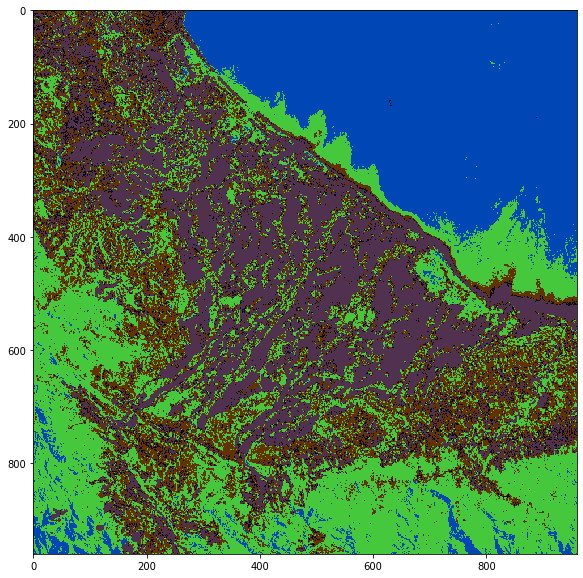

In [23]:
figure(figsize=(10,10))
imshow(seg)
cv2.imwrite('imgSeg.png',seg)